<a href="https://colab.research.google.com/github/Nivac05/Big-data-work/blob/main/BD2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-learn pandas matplotlib seaborn


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
import pandas as pd
import os

# Dataset path
path = "/kaggle/input/vehicle-dataset-from-cardekho"

# List all files in the directory
files = os.listdir(path)
print("Files found:", files)




Files found: ['car data.csv', 'car details v4.csv', 'CAR DETAILS FROM CAR DEKHO.csv', 'Car details v3.csv']


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nehalbirla/vehicle-dataset-from-cardekho")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/vehicle-dataset-from-cardekho


In [ ]:
# Load dataset
california = fetch_california_housing()

# Convert to DataFrame

df = pd.read_csv(path + '/CAR DETAILS FROM CAR DEKHO.csv')



# Show first 5 rows
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [ ]:
name_counts = df['owner'].value_counts()
print(name_counts)


owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


In [ ]:
X = df.drop(['selling_price','owner'], axis=1)
y = df['selling_price']

In [ ]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal on key numeric columns
df = df.copy()
df = remove_outliers_iqr(df_clean, 'selling_price')
df = remove_outliers_iqr(df_clean, 'km_driven')
df = remove_outliers_iqr(df_clean, 'year')  # Optional: removes very old cars

print("Original shape:", df.shape)
print("After outlier removal:", df_clean.shape)


Original shape: (3795, 10)
After outlier removal: (3795, 10)


In [ ]:
# 1. Encode binary columns
df['fuel_binary'] = df['fuel'].map({'Petrol': 0, 'Diesel': 1})
df['owner_encoded'] = df['owner'].map({
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
})

# 2. Drop rows with missing values
df = df.dropna()

# 3. Define features and target
X = df[['year', 'km_driven', 'seller_type', 'transmission', 'fuel_binary', 'owner_encoded']]
y = df['selling_price']

In [ ]:
# 4. One-hot encode categorical columns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
categorical_cols = ['seller_type', 'transmission']
numerical_cols = ['year', 'km_driven', 'fuel_binary', 'owner_encoded']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])




Summary statistics:
               year      km_driven  selling_price  fuel_binary  owner_encoded  \
count  3795.000000    3795.000000   3.795000e+03  3795.000000    3795.000000   
mean   2013.299868   62450.690909   4.036410e+05     0.474308       1.447167   
std       3.743656   36314.875360   2.467914e+05     0.499405       0.712890   
min    2004.000000       1.000000   2.000000e+04     0.000000       1.000000   
25%    2011.000000   35000.000000   2.100000e+05     0.000000       1.000000   
50%    2014.000000   60000.000000   3.500000e+05     0.000000       1.000000   
75%    2016.000000   90000.000000   5.500000e+05     1.000000       2.000000   
max    2020.000000  172000.000000   1.165000e+06     1.000000       5.000000   

       seller_type  transmission  
count  3795.000000   3795.000000  
mean      0.801581      0.065349  
std       0.453880      0.247173  
min       0.000000      0.000000  
25%       1.000000      0.000000  
50%       1.000000      0.000000  
75%       1.0

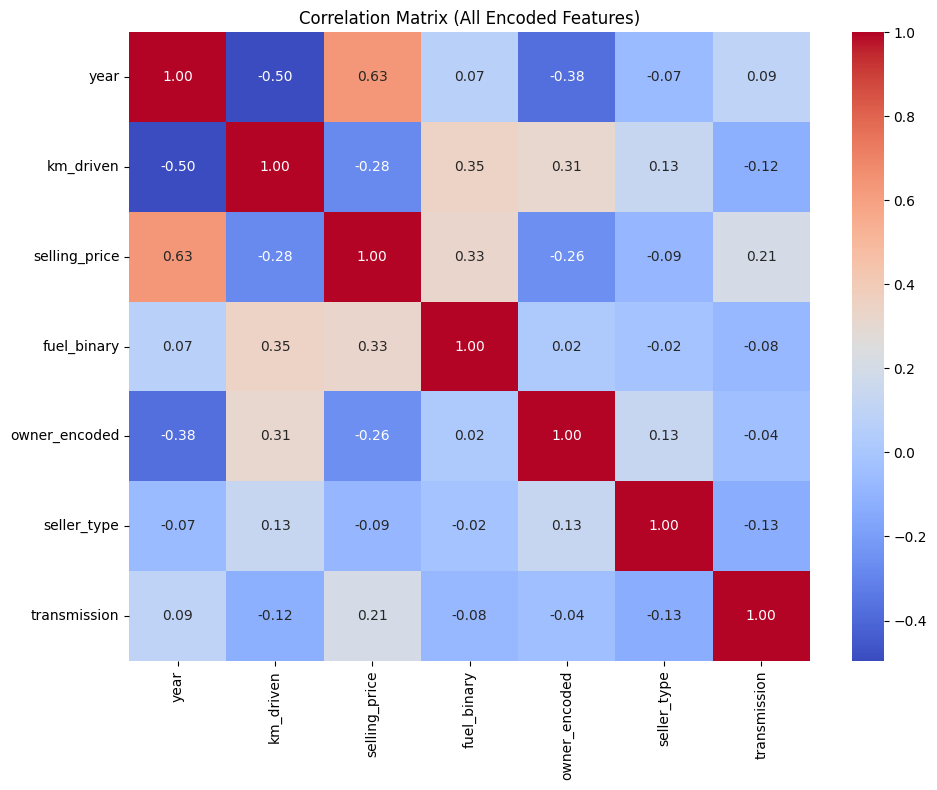

In [ ]:


# Create a new DataFrame that only includes encoded and numeric columns
df_numeric = df[['year', 'km_driven', 'selling_price', 'fuel_binary', 'owner_encoded']].copy()

# Temporarily encode 'seller_type' and 'transmission' for correlation
df_numeric['seller_type'] = df['seller_type'].map({'Dealer': 0, 'Individual': 1, 'Trustmark Dealer': 2})
df_numeric['transmission'] = df['transmission'].map({'Manual': 0, 'Automatic': 1})

# 1. Summary statistics
print("Summary statistics:\n", df_numeric.describe())

# 2. Check for missing values
print("\nMissing values per column:\n", df_numeric.isnull().sum())

# 3. Correlation matrix
corr_matrix = df_numeric.corr()

# 4. Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix (All Encoded Features)')
plt.tight_layout()
plt.show()


In [ ]:
# Re-define features and target from cleaned data
X = df[['year', 'km_driven', 'seller_type', 'transmission', 'fuel_binary', 'owner_encoded']]
y = df['selling_price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Re-train the pipeline
model.fit(X_train, y_train)

# Now it's safe to evaluate
y_pred = model.predict(X_test)
r2 = model.score(X_test, y_test)

print("R² Score:", r2)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (same as Standard Error of Estimate here)
rmse = np.sqrt(mse)

# Adjusted R²
n = X_test.shape[0]  # number of samples
p = X_test.shape[1]  # number of features (after encoding)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print results
print(f"R² Score: {r2:.4f}")
print(f"Adjusted R² Score: {adjusted_r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE / Std Error): {rmse:.4f}")


R² Score: 0.5255388269557502
R² Score: 0.5255
Adjusted R² Score: 0.5218
Mean Squared Error (MSE): 26597281148.4551
Root Mean Squared Error (RMSE / Std Error): 163086.7289


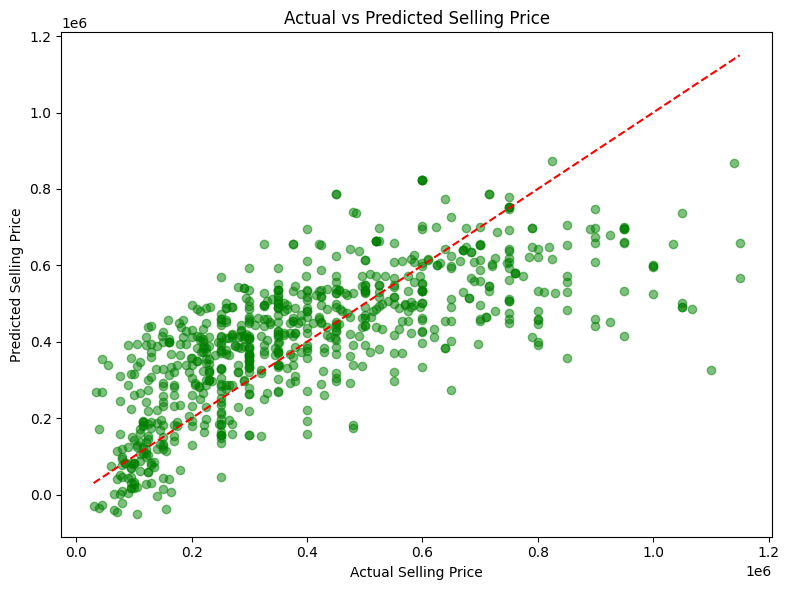

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Price')
plt.tight_layout()
plt.show()


In [ ]:
# Only include numeric columns for correlation
correlation_with_target = df[['year', 'km_driven', 'fuel_binary', 'owner_encoded', 'selling_price']].corr()

# Show correlation of all features with selling_price
print("Correlation with selling_price:\n")
print(correlation_with_target['selling_price'].sort_values(ascending=False))


Correlation with selling_price:

selling_price    1.000000
year             0.632678
fuel_binary      0.327085
owner_encoded   -0.261493
km_driven       -0.276691
Name: selling_price, dtype: float64
